https://machinelearningmastery.com/training-a-pytorch-model-with-dataloader-and-dataset/

<H1>Training a PyTorch Model with DataLoader and Dataset</H1>

<H1>Using DataLoader in a Training Loop</H1>

In [3]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
# from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import time
start_time = time.time()


# CUDA
print(f'CUDA device name: {torch.cuda.get_device_name(0)}')
print(f'Pytorch CUDA Version: {torch.version.cuda}')
print()


# Read data, convert to NumPy arrays
data = pd.read_csv("data/sonar_samples_for_TDS.csv", header=None)
X = data.iloc[:, 0:3].values
y = data.iloc[:, 3].values

# convert into PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
 
# create DataLoader, then take one batch
loader = DataLoader(list(zip(X,y)), shuffle=True, batch_size=16)       # batch_size=16

# train-test split for evaluation of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)



# Define nodes
nds = 4

# Define model                                  # 3 inputs, 2 Hidden Layers with each 4 nodes and 1 Output
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3, nds),
            nn.ReLU(),
            nn.Linear(nds, nds),
            nn.ReLU(),
            nn.Linear(nds, 1),
            nn.ReLU()
            # nn.Sigmoid() 
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# model = NeuralNetwork().to(device)
# print(model)

# create model                                  # 3 inputs, 2 Hidden Layers with each 4 nodes and 1 Output
model = nn.Sequential(
    nn.Linear(3, nds),
    nn.ReLU(),
    nn.Linear(nds, nds),
    nn.ReLU(),
    nn.Linear(nds, 1),
    nn.ReLU()
    # nn.Sigmoid()  
)


# Train the model
n_epochs = 600                                          # n_epochs = 200
loss_fn = nn.MSELoss()
loss_values = []
optimizer = optim.SGD(model.parameters(), lr=0.001)     # lr=0.001
model.train()
for epoch in range(n_epochs):
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_values.append(loss.item())                 # Appending loss


# evaluate accuracy after training
model.eval()
y_pred = model(X_test)
acc = (y_pred.round() == y_test).float().mean()
acc = float(acc)
print("Model accuracy: %.2f%%" % (acc*100))


# Print time elapsed
print()
dur = (round(time.time() - start_time, 2))
print(f'Duration: {dur} seconds')

CUDA device name: NVIDIA GeForce RTX 3050 Ti Laptop GPU
Pytorch CUDA Version: 11.7

Model accuracy: 88.79%

Duration: 34.0 seconds


<H1><B>Training loss</B> vs <B>Validation loss</B></H1>

ValueError: x and y must have same first dimension, but have shapes (600,) and (126000,)

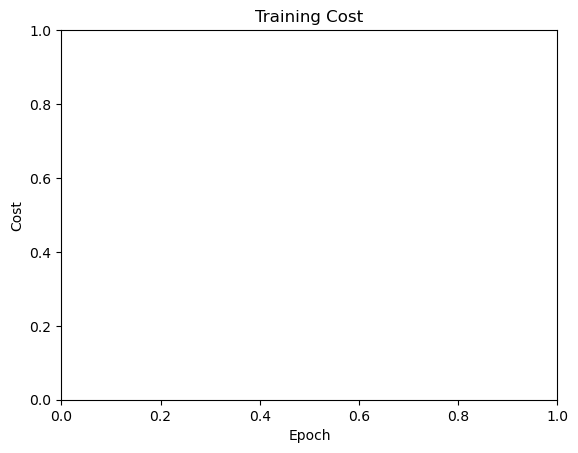

In [4]:
fig, ax = plt.subplots()
ax.set(xlabel='Epoch', ylabel='Cost', title="Training Cost")

plt.plot([x for x in range(n_epochs)], loss_values, 'red')
plt.show()